## Function Definitions

In [1]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

def query(char):
    global words
    lst = []
    for i in words:
        if (char in i): lst.append(i)
    return(lst)


def plot_dendro(cluster_data, method='average', metric='cosine', figsize=[20,20]):
    plt.figure(figsize=(figsize[0], figsize[1]))
    dend = shc.dendrogram(shc.linkage(cluster_data, method='average', metric='cosine'))


def cluster(cluster_data, n_clusters=5):

    # Cluster algorithm
    cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='cosine', linkage='average')
    cluster.fit_predict(cluster_data)

    # Print cluster label with word
    clustered = pd.DataFrame(list(zip(list(cluster_data.index), cluster.labels_)),
                             columns=['word', 'cluster'])

    for i in range(n_clusters):
        idx = clustered['cluster'] == i
        print(clustered[idx], '\n\n')
    
    # Return cluster object
    return(cluster)


# Return Mean Vector for each cluster (stored in a nested list)
def cluster_embeddings(cluster_data, cluster_labels):
    lst = []
    for i in list(set(cluster_labels)):
        mean_vector = cluster_data[cluster_labels == i].mean()
        lst.append(list(mean_vector))

    return(lst)

## Prepare Data

In [2]:
import pickle
with open('pd_embedings.pkl', 'rb') as f:
    wordvecs = pickle.load(f)

words = list(wordvecs.head(0)) # must exist for `query()` to work

In [10]:
wordvecs[query('葡')].head()

,葡萄酒,葡萄牙,葡萄,葡萄牙语,葡萄糖,葡京,葡,葡萄牙語,葡萄园,葡萄牙人,...,葡勝納嚴選,葡學,中葡,葡甲胺,葡萄醋,葡萄糖胺飲,葡京路,葡萄與,葡京市,葡萄還
0,-0.0107,-0.0641,0.2232,-0.1622,-0.0192,-0.0843,-0.0758,-0.1645,0.0297,-0.0998,...,-0.0115,-0.0211,0.0470,0.0683,0.0287,-0.0243,-0.0385,-0.0230,-0.0273,-0.0182
1,0.0904,-0.0035,0.0520,-0.0898,-0.0344,-0.1131,-0.1578,-0.0953,0.0139,-0.0135,...,0.0073,0.0032,-0.0094,-0.0344,0.0306,-0.0952,-0.1045,0.0529,-0.0195,0.0227
2,0.1878,0.0340,0.3493,0.1307,0.0915,0.2593,0.2870,0.1258,0.2029,0.1016,...,0.0342,0.1182,0.0845,0.0621,0.0180,0.0450,0.0342,-0.0022,0.0989,0.0817
3,-0.0120,-0.2320,-0.0202,-0.1869,0.1084,-0.3749,-0.4593,-0.0655,-0.1323,-0.1145,...,-0.0125,-0.0085,-0.1292,-0.0333,-0.0064,0.0040,-0.0574,0.0308,-0.0720,0.0234
4,-0.0263,0.0984,0.0684,-0.0241,-0.0842,0.1494,0.1108,0.0392,0.1461,0.1538,...,0.0193,0.0410,-0.0093,-0.0433,0.0203,-0.0010,0.0429,0.0148,-0.0040,0.0374


## Hierachical Clustering

In [8]:
cluster_data = wordvecs[query('葡')].T

### Dendrogram

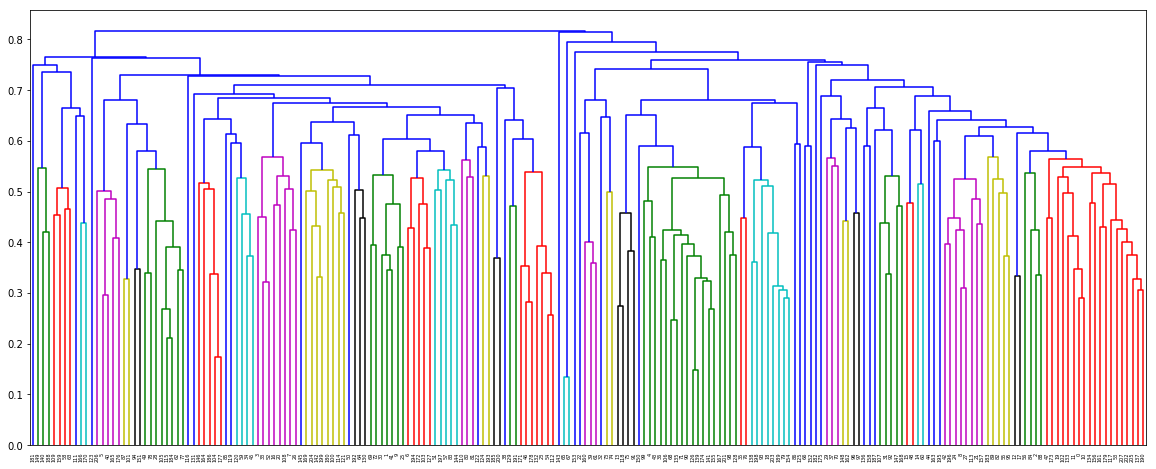

In [19]:
plot_dendro(cluster_data, figsize=[20,8])

### Clustering

In [28]:
cluster_obj = cluster(cluster_data, n_clusters=3)

      word  cluster
0      葡萄酒        0
2       葡萄        0
4      葡萄糖        0
8      葡萄园        0
10    白葡萄酒        0
11    红葡萄酒        0
12     葡萄干        0
13    葡萄球菌        0
14     葡萄籽        0
15     葡萄柚        0
17     葡萄乾        0
18    葡萄糖胺        0
19     葡萄汁        0
21     葡萄園        0
22     葡萄胎        0
24     葡萄藤        0
27     葡萄树        0
29     葡萄架        0
31     葡萄科        0
32     葡萄石        0
35     葡萄王        0
36     葡聚糖        0
37     葡萄沟        0
39    葡萄膜炎        0
42     葡萄樹        0
43      葡糖        0
44     葡萄苗        0
47     山葡萄        0
48    葡萄柚汁        0
53    紅葡萄酒        0
..     ...      ...
152    葡萄色        0
153    葡萄团        0
154  葡萄糖胺錠        0
155    葡萄醣        0
156     葡�        0
157    葡萄農        0
158    葡萄纹        0
160    葡萄肿        0
161   對葡萄酒        0
162    葡萄村        0
163   葡萄酒業        0
167     葡立        0
168    葡萄螺        0
173   山葡萄酒        0
174    葡萄胺        0
175    葡萄城        0
179   與葡萄酒        0
182   葡萄园主        0


## Mean Vector of Each Cluster

In [38]:
cluster_vecs = cluster_embeddings(cluster_data, cluster_obj.labels_)

# Mean vector of cluster 1
cluster_vecs[0]

[0.03546972477064221,
 0.010001834862385315,
 0.08661100917431191,
 -0.01266422018348624,
 0.022615596330275232,
 0.06457614678899083,
 0.005137614678899085,
 0.01042201834862385,
 -0.02357522935779817,
 0.022784403669724774,
 -0.0539348623853211,
 0.025817431192660535,
 -0.010033944954128446,
 0.004005504587155967,
 -0.008008256880733939,
 0.03487522935779818,
 0.03417706422018349,
 -0.008424770642201838,
 0.007632110091743118,
 0.04805229357798168,
 0.07717981651376146,
 -0.0015009174311926593,
 0.05970366972477064,
 -0.010198165137614682,
 0.0025000000000000005,
 -0.033129357798165136,
 -0.0618862385321101,
 -0.018916513761467888,
 -0.024333944954128446,
 0.0527633027522936,
 0.02548073394495413,
 0.03603302752293576,
 0.009077981651376148,
 0.00048532110091742875,
 0.08908532110091746,
 0.011560550458715603,
 -0.022388073394495406,
 -0.006722018348623859,
 -0.01762201834862385,
 -0.07335412844036696,
 0.0544559633027523,
 -0.043992660550458716,
 -0.037344954128440355,
 -0.033829357

---

# Case Studies

## 1. 猴 vs. 猿

假設：這兩個字的某個 Sense (Mean vector of one cluster) 的應該會有**高相似度** (cosine similarity)

### 猴

         word  cluster
24        电视猴        0
32        大嘴猴        0
41         猴爺        0
62         猴猴        0
76         油猴        0
78         猴屁        0
106        云猴        0
111       比比猴        0
119        花猴        0
120        魔猴        0
138       悠嘻猴        0
166       大泼猴        0
195        紅猴        0
230       乐比猴        0
231        猴网        0
235        快猴        0
242        乐猴        0
244       輔大猴        0
245       云猴网        0
256       猴主题        0
282     金猴玛丁图        0
304       魔猴网        0
321       猴抓妹        0
366  Monkey猴猴        0
377  frank大嘴猴        0
383       快猴网        0
387       特特猴        0 


     word  cluster
0      猴子        1
1      猴年        1
2     猕猴桃        1
3       猴        1
4      猴王        1
5      猕猴        1
6      猿猴        1
7     金丝猴        1
8      小猴        1
9      狐猴        1
10     儆猴        1
11     属猴        1
12     猴急        1
13     獼猴        1
15     猴硐        1
16     抓猴        1
17     猴头        1
18     金猴  

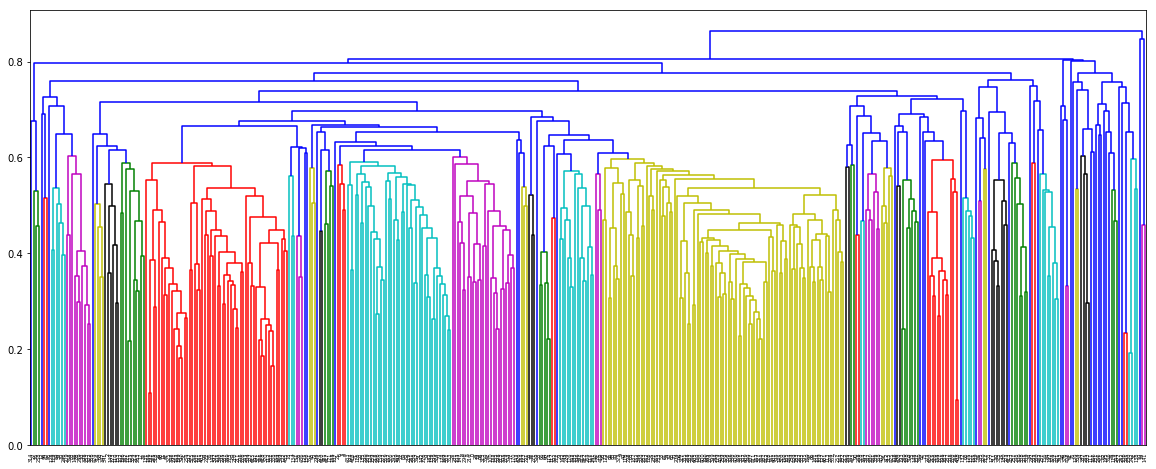

In [3]:
cluster_data = wordvecs[query('猴')].T
plot_dendro(cluster_data, figsize=[20,8])
cluster_obj = cluster(cluster_data, n_clusters=5)

# Compute Mean Vector
cluster_vecs_monkey = cluster_embeddings(cluster_data, cluster_obj.labels_)
#cluster_vecs_monkey[1]

### 猿

      word  cluster
11      海猿        0
15      犬猿        0
19      猿飛        0
20    猿飛佐助        0
23      黃猿        0
24     柳白猿        0
29     猿拂村        0
33      猿飞        0
35     猿岩石        0
36      猿田        0
38      猿島        0
40      猿渡        0
41      猿樂        0
42      黄猿        0
53      野猿        0
56     猿樂町        0
60     猿飞日        0
65      猿山        0
66      猿蟹        0
70      猿江        0
75      猿丸        0
79      猿神        0
80      猿野        0
81     猿島郡        0
83   猿飛阿斯瑪        0
89      猿谷        0
93      猿橋        0
95     猿田彥        0
100    伏見猿        0
101   猿飛蒜山        0
102     猿時        0
107   野猿公苑        0
114     猿创        0
115     赤猿        0
118     猿川        0
121     猿乐        0
123     毒猿        0
129    猿比古        0
134     猿女        0
138     猿投        0
145    猿飞君        0
146  猿飞阿斯玛        0
147     猿拂        0
155   海猿3D        0
158   猿渡哲也        0
160     猿町        0
164  市川猿之助        0
171  猿柿日世里        0
178     猿藏        0


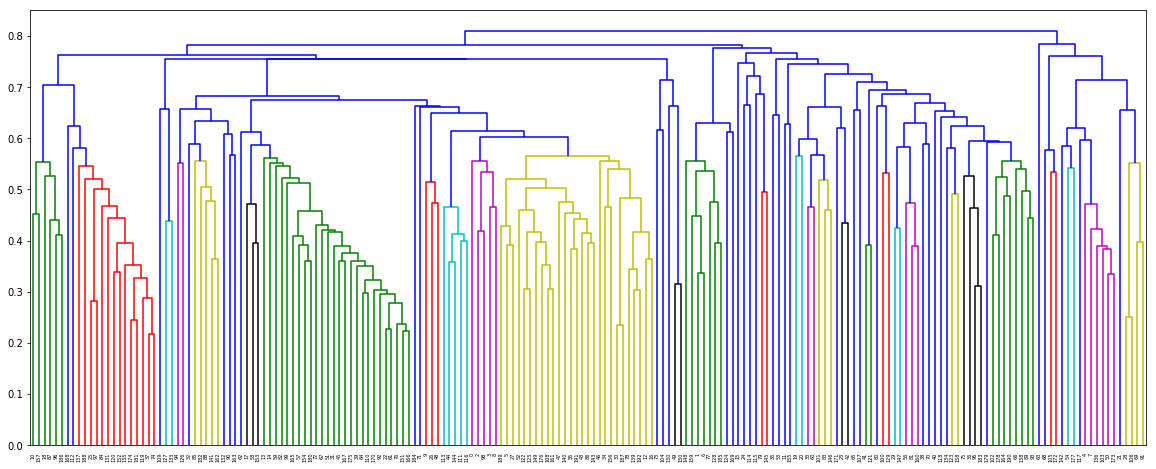

In [4]:
cluster_data2 = wordvecs[query('猿')].T
plot_dendro(cluster_data2, figsize=[20,8])
cluster_obj2 = cluster(cluster_data2, n_clusters=5)

cluster_vecs_primate = cluster_embeddings(cluster_data2, cluster_obj2.labels_)
#cluster_vecs_primate[1]

## Cosine Similarity: 猴 vs. 猿

In [6]:
from numpy import dot
from numpy.linalg import norm
def cos_sim(lst1, lst2, msg=''):
    cossim = dot(lst1, lst2)/(norm(lst1)*norm(lst2))
    print(msg, cossim)
    return(cossim)

cos_sim(cluster_vecs_monkey[1], cluster_vecs_primate[1], '猴1 vs 猿1：')
cos_sim(cluster_vecs_monkey[0], cluster_vecs_primate[1], '猴0 vs 猿1：')
cos_sim(cluster_vecs_monkey[1], cluster_vecs_primate[0], '猴1 vs 猿0：')
cos_sim(cluster_vecs_monkey[0], cluster_vecs_primate[0], '猴0 vs 猿0：')

猴1 vs 猿1： 0.8556271735017498
猴0 vs 猿1： 0.5587297992671288
猴1 vs 猿0： 0.667648824333093
猴0 vs 猿0： 0.6234734397448304


0.6234734397448304

## 2. Comparison with CWN

### 2.1 好

預期：看出破音字 (3 vs. 4 聲)

      word  cluster
0        好        0
1       良好        0
2       好评        0
3       最好        0
4       做好        0
6       好好        0
7       美好        0
8       好友        0
9       好看        0
10     好评率        0
11      好的        0
12      好吃        0
13      好用        0
14      只好        0
15      好多        0
16      好感        0
17      好玩        0
19      好处        0
20      友好        0
22      好奇        0
23      好几        0
24      看好        0
25      也好        0
26      好康        0
27      好人        0
29      好在        0
30      好吧        0
31     好莱坞        0
33      好久        0
34      较好        0
...    ...      ...
3234   好报胖        0
3235   淘好书        0
3236   好兒子        0
3237   好意頭        0
3238    頁好        0
3239    栓好        0
3240    潤好        0
3241    好悠        0
3242   較好耶        0
3243   你好樣        0
3244    板好        0
3245    好調        0
3246   好喝耶        0
3247    好乳        0
3248    好凍        0
3249    准好        0
3250   不好养        0
3251    好憎        0


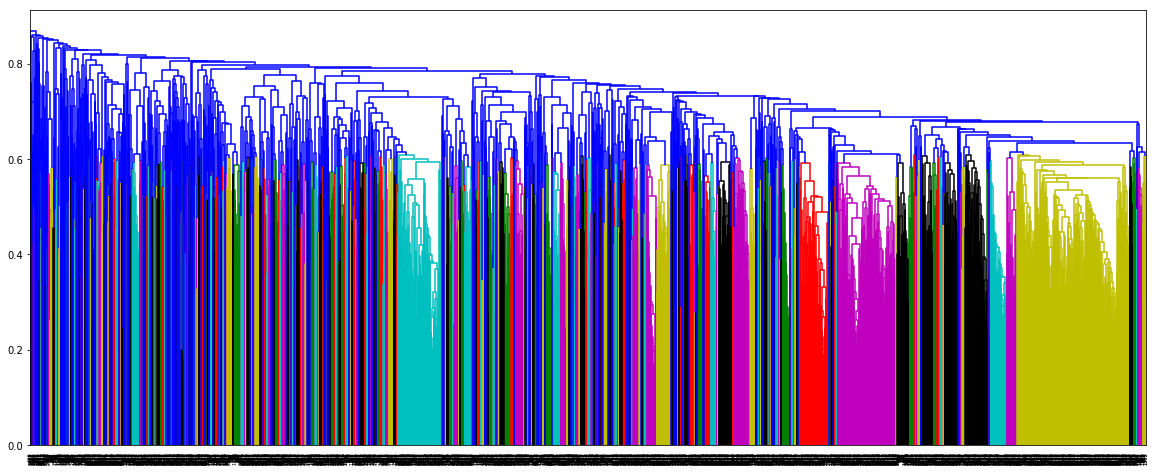

In [10]:
cluster_data = wordvecs[query('好')].T
plot_dendro(cluster_data, figsize=[20,8])
cluster_obj = cluster(cluster_data, n_clusters=17)

# Compute Mean Vector
cluster_vecs = cluster_embeddings(cluster_data, cluster_obj.labels_)
#cluster_vecs[1]

#### 結果

- `ㄏㄠˋ：容易，常用於疾病` 對應到 cluster 8
- `ㄏㄠˋ：喜愛並養成習慣` 對應到 cluster 7